# Evaluation Multiple Models

다양한 머신러닝 분류 알고리즘 성능비교

</br>
(여기서는 다음 네가지 알고리즘만 사용 </br>
"DecisionTreeClassifier","RandomForestClassifier","XGBClassifier","LGBMClassifier") 

결과는 

In [19]:
!pip install pandas numpy seaborn matplotlib scipy scikit-learn xgboost graphviz lightgbm

In [20]:
import numpy as np
import pandas as pd
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from ml_classifiers import Classifiers
from IPython.display import display, HTML
import seaborn as sns
from sklearn.metrics import accuracy_score
from joblib import load
from scipy.stats import uniform as sp_uniform
from matplotlib import rc, font_manager

from lightgbm import early_stopping, log_evaluation
from ml_classifiers import Classifiers
display(HTML(""))

## Data

Let's load the compound data file.

In [21]:
cmpd_df = pd.read_csv('cmpd.csv')
cmpd_df.head()

,inchikey,smiles,group,activity
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active


In [22]:
cmpd_df.shape

(5530, 4)

There are 5530 compound samples with:
* SMILES - 2D compound structure,
* InChIKey - a hash from InChI,
* group - a tag to split the dataset into train and test
* activity - y label

In [23]:
cmpd_df['mol'] = cmpd_df.smiles.apply(Chem.MolFromSmiles)

### ml_classfiers 라이브러리를 사용하여 머신러닝 분류 알고리즘 별 성능 비교


 
---------------------- DecisionTreeClassifier ---------------------- 
 >>> estimator_params: None
 >>> fit_params: None
 >>> Finished. (elapsed_time: 5s) 
 
---------------------- LGBMClassifier ---------------------- 
 >>> estimator_params: None
 >>> fit_params: None
 >>> Finished. (elapsed_time: 3s) 
 
---------------------- RandomForestClassifier ---------------------- 
 >>> estimator_params: None
 >>> fit_params: None
 >>> Finished. (elapsed_time: 9s) 
 
---------------------- XGBClassifier ---------------------- 
 >>> estimator_params: None
 >>> fit_params: None
 >>> Finished. (elapsed_time: 61s) 


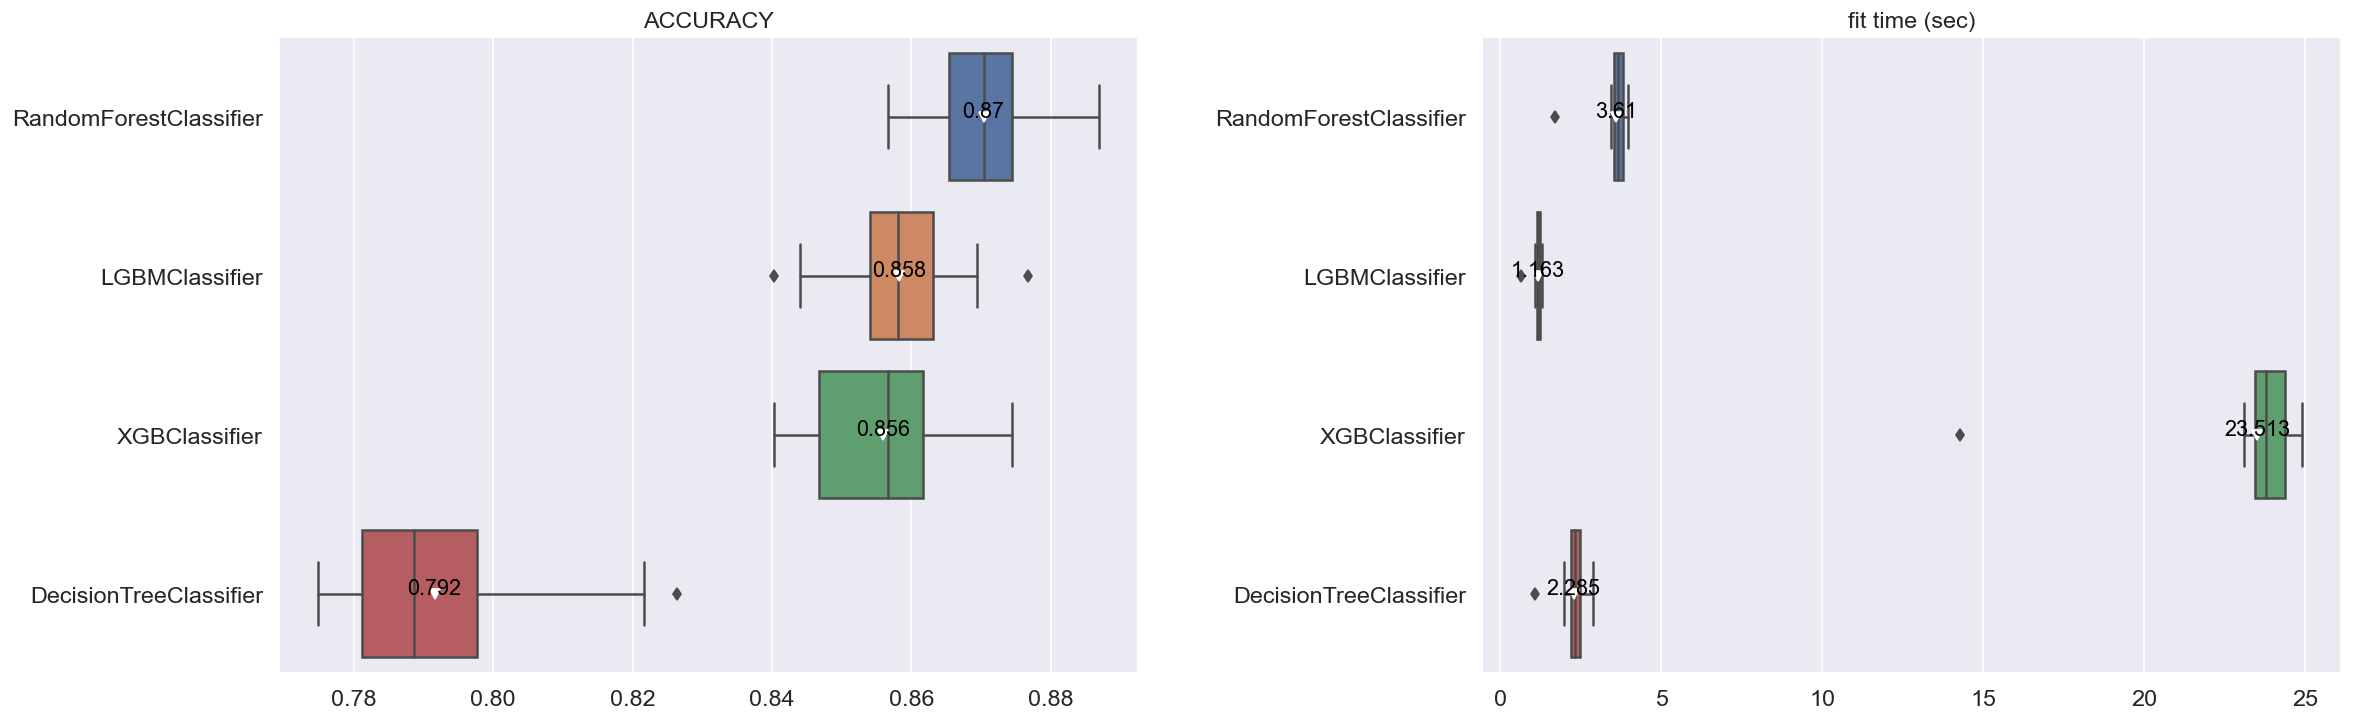

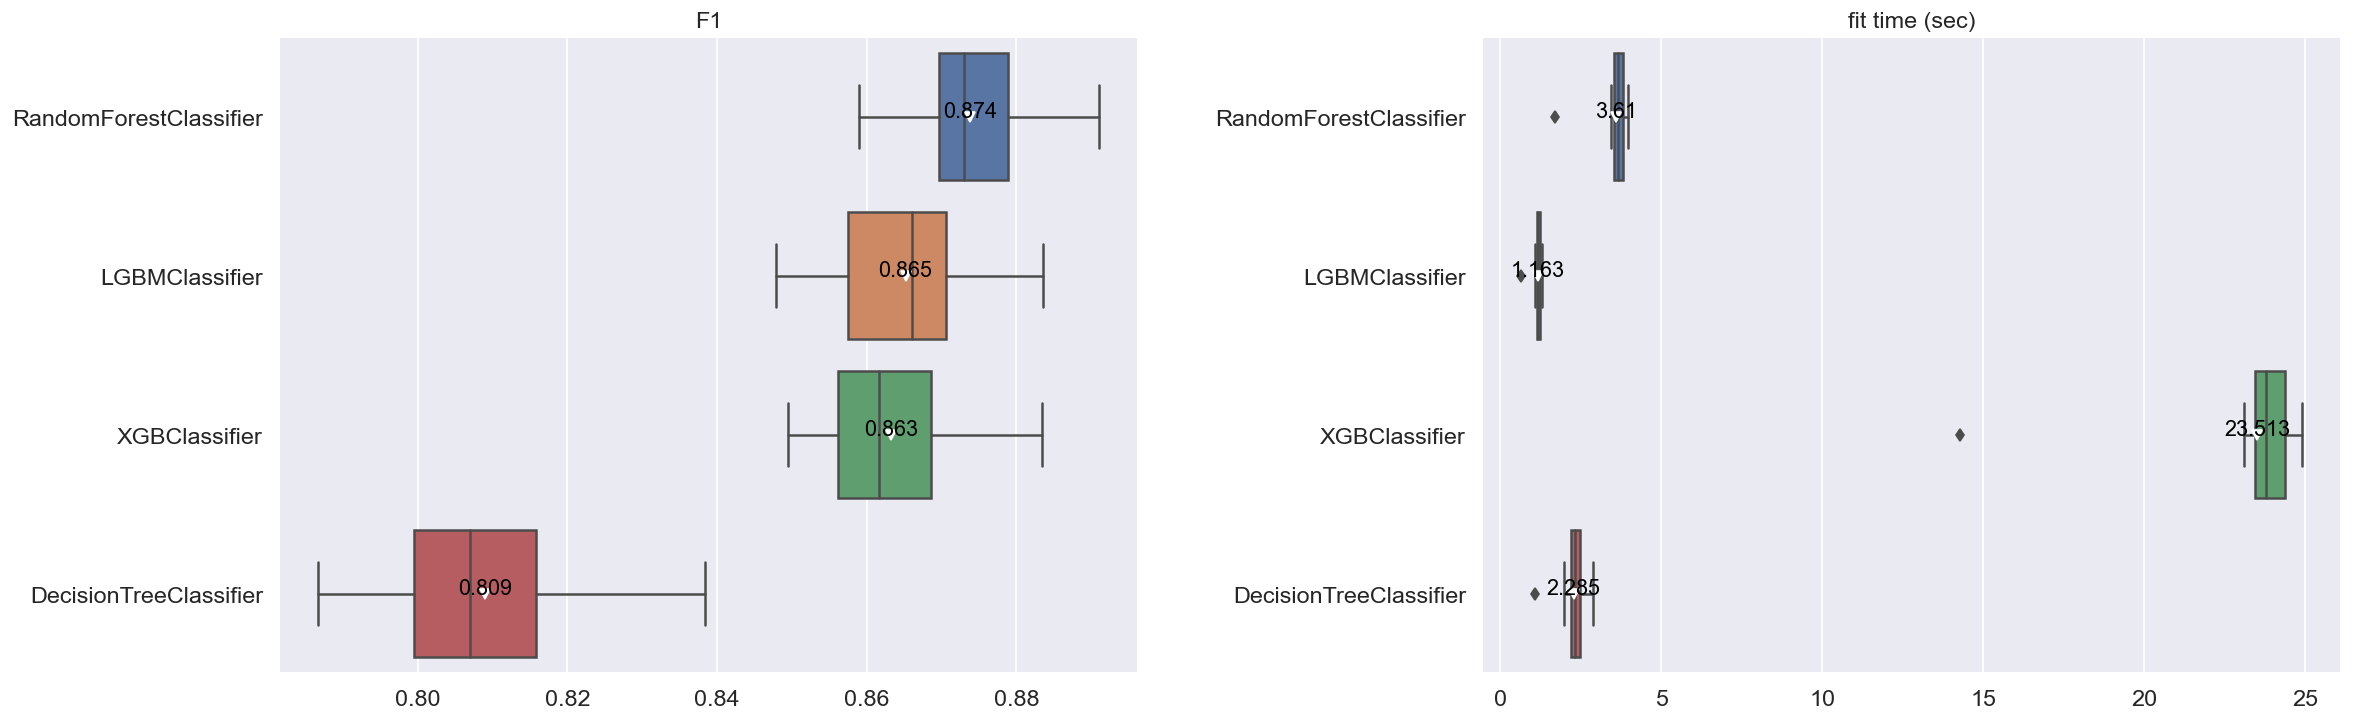

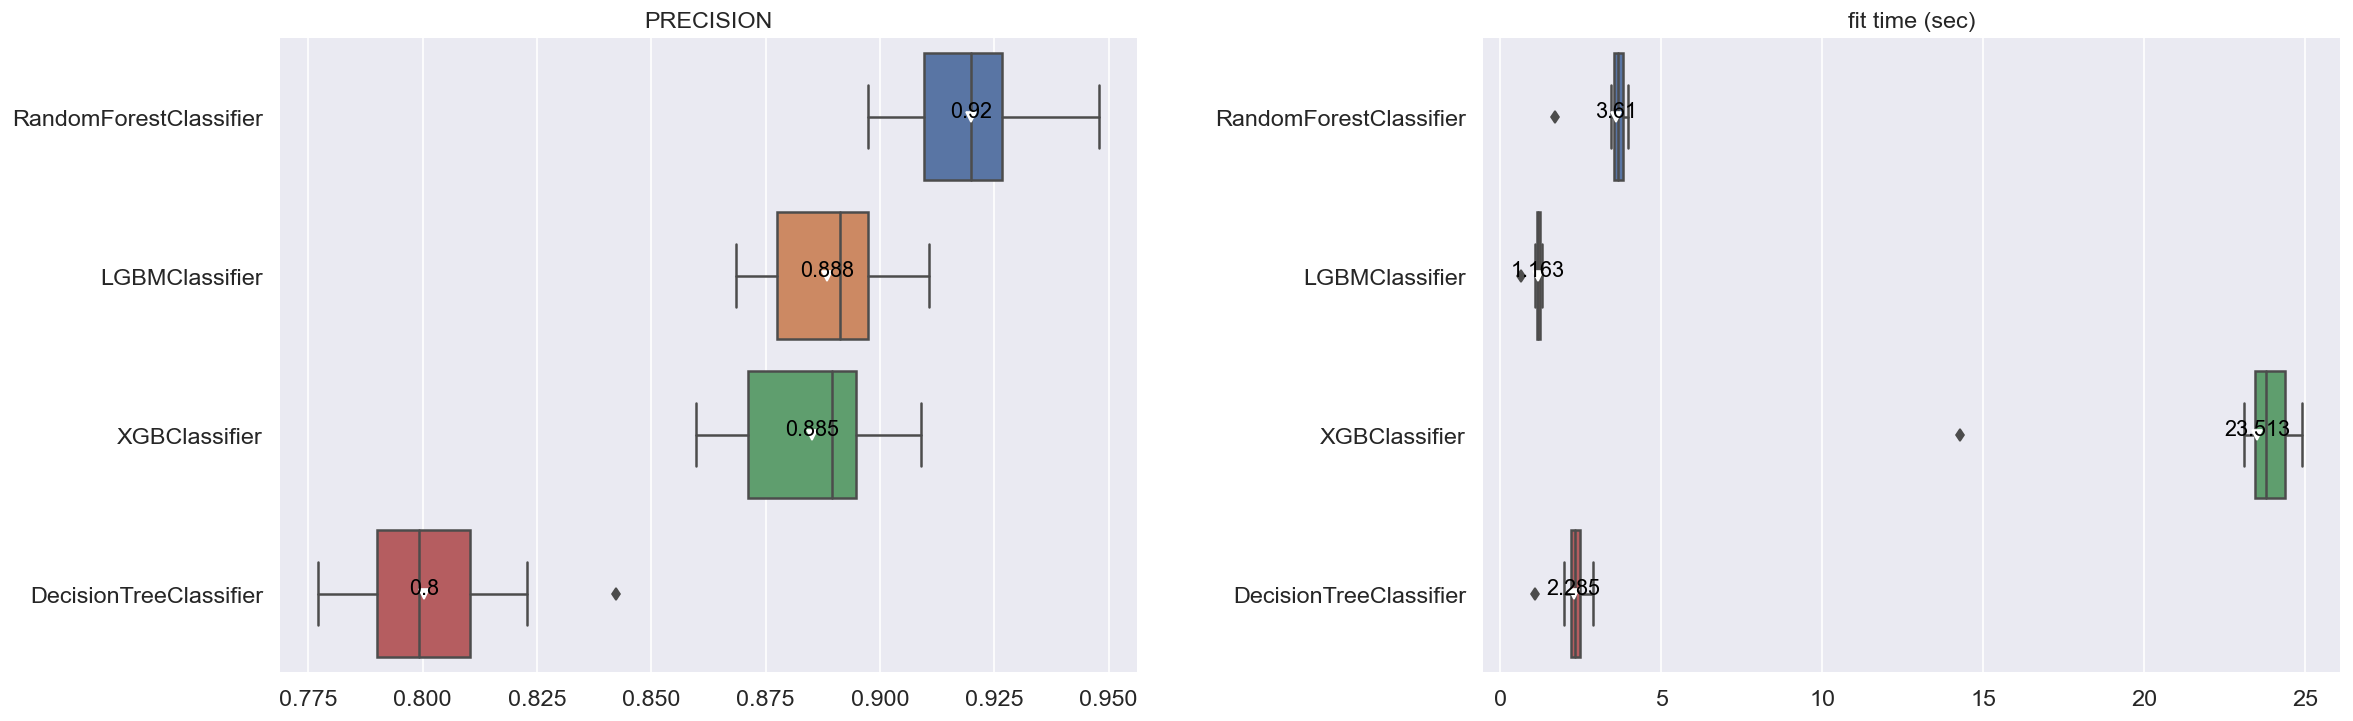

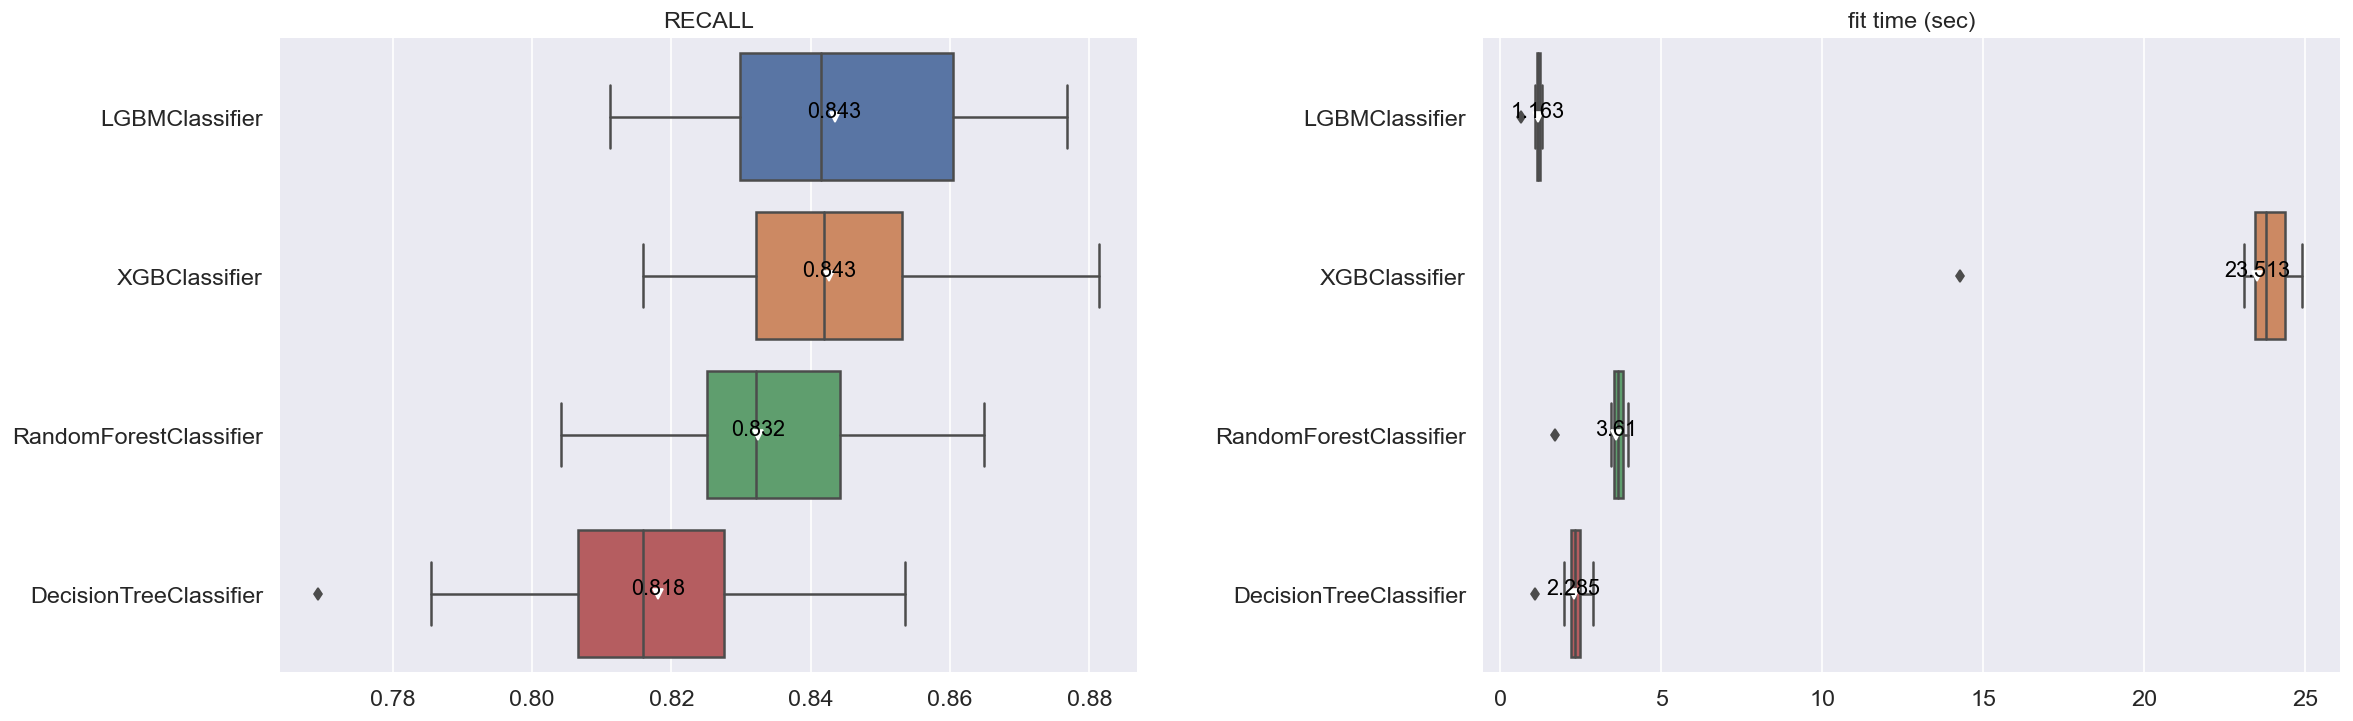

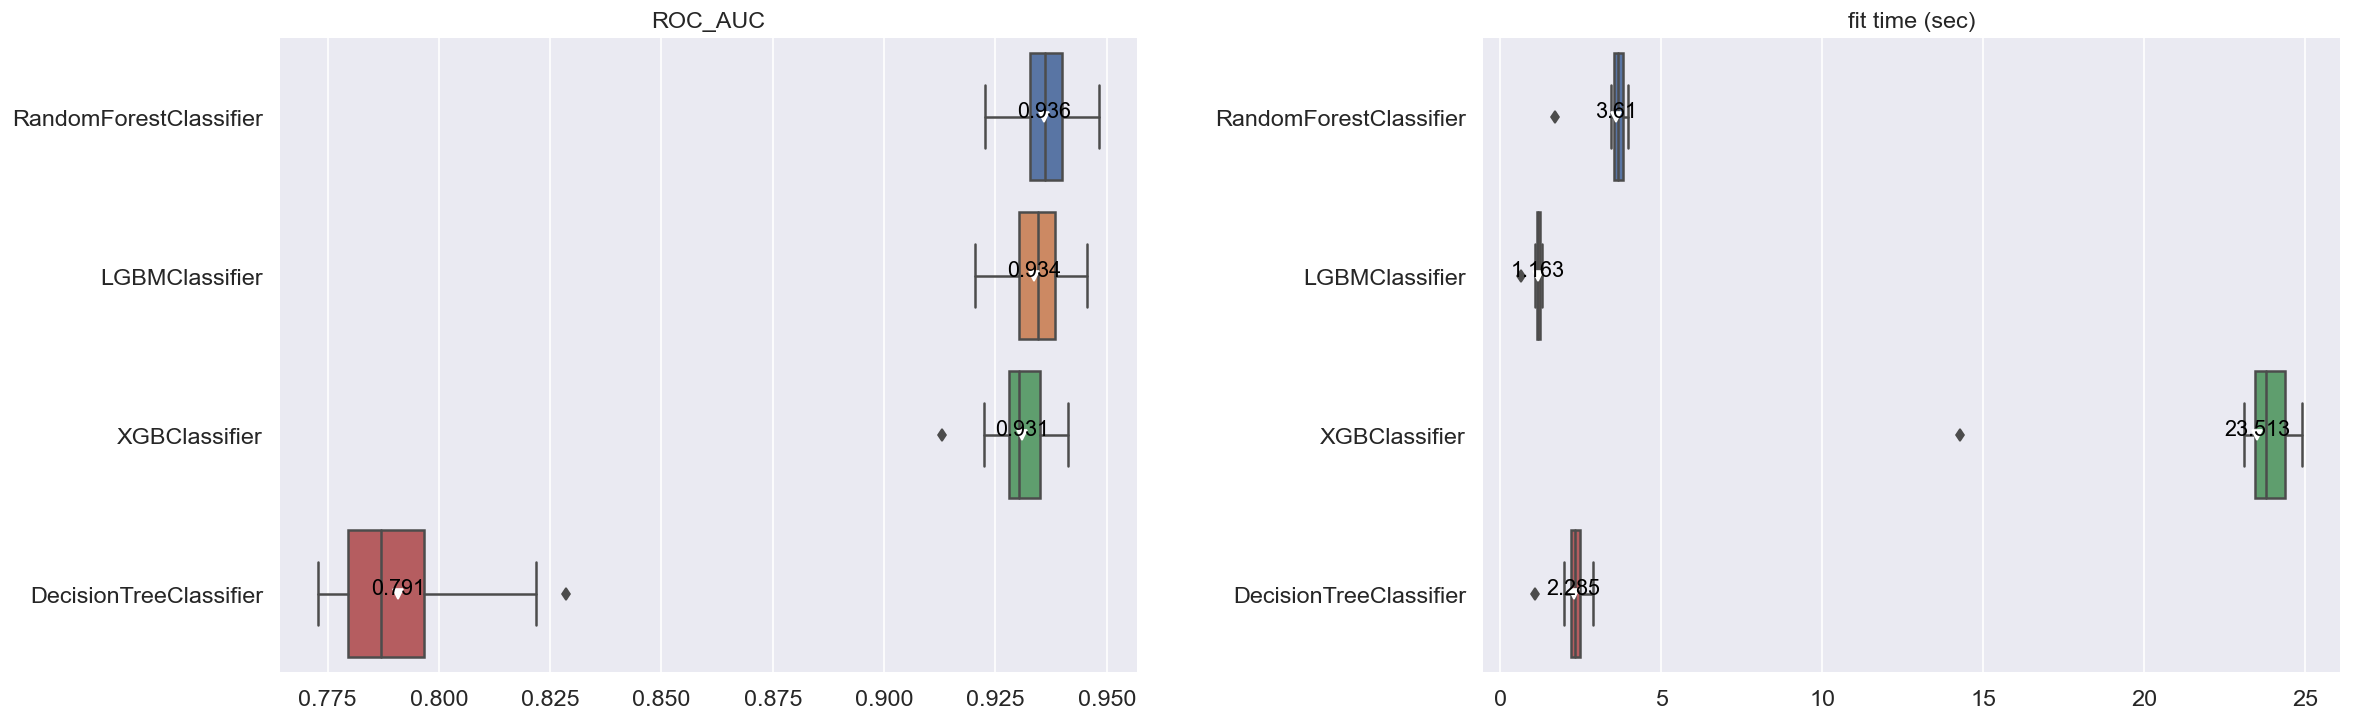

In [24]:
clf = Classifiers(feature_scaler="RobustScaler")

estimators = [
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "XGBClassifier",
    "LGBMClassifier",
]

scoring = ["accuracy", "recall", "precision", "f1", "roc_auc"]

clf.run_cross_validation(    
    X = np.vstack(cmpd_df[cmpd_df.group.eq('train')].mol.apply(lambda m: list(AllChem.GetMorganFingerprintAsBitVect(m, 4, nBits=2048)))),
    y = cmpd_df[cmpd_df.group.eq('train')].activity.eq('active').astype(float).to_numpy(),     
    estimators=estimators,  # 예측 알고리즘
    scoring=scoring,  # 모델 성능 지표    
    kfold="RepeatedStratifiedKFold",  
    n_splits=5,  
    n_repeats=5,  
)

clf.show_cross_validation_result()

---
reference : https://github.com/yg-hwang/ml_classifiers